In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl


In [2]:
hyades = pd.read_csv('Hyades-gaia.csv')

In [5]:
print(hyades)


               source_id  phot_g_mean_mag     bp_rp         mg   parallax  \
0      49520255665123328        12.861299  2.546597   9.462525  20.904768   
1      49729231594420096         5.790159  0.445381   2.479940  21.774901   
2      51383893515451392        12.570355  2.371448   9.353815  22.734841   
3     145373377272257664         6.990021  0.680235   3.808769  23.107320   
4     145391484855481344         5.643206  0.367818   2.145827  19.976727   
..                   ...              ...       ...        ...        ...   
510  3308808002721345280        18.641272  3.757902  15.109829  19.665794   
511  3308851433430549632        15.490333  3.242273  12.185657  21.830561   
512  3309006602007842048         8.126219  0.831171   4.669801  20.357130   
513  3308957845537774976        18.129725  4.158508  14.716873  20.769679   
514  3308896238528440448        10.928127  1.698966   7.529371  20.904930   

     parallax_error         ra        dec        pmra      pmdec  ...  \
0 

In [10]:
Gmag = hyades['phot_g_mean_mag']
color = hyades['bp_rp']

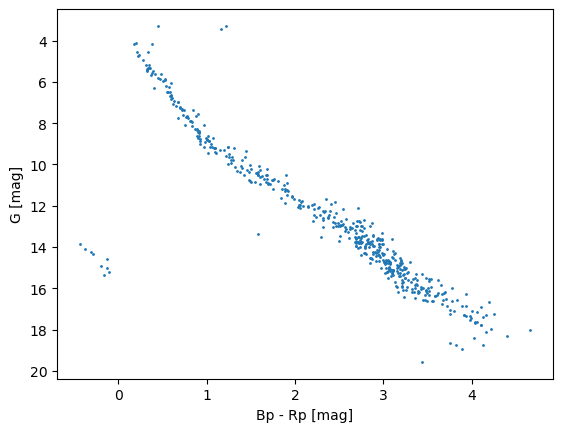

In [17]:
pl.figure()
pl.scatter(color, Gmag, s= 1)
pl.gca().invert_yaxis()
pl.xlabel('Bp - Rp [mag]')
pl.ylabel('G [mag]')
pl.savefig('CMD.jpeg')
pl.show()

In [19]:
prllx = hyades['parallax']
distance = 1/(prllx*1e-3) # pc

In [20]:
M_g= Gmag - 5*np.log10(distance)+5

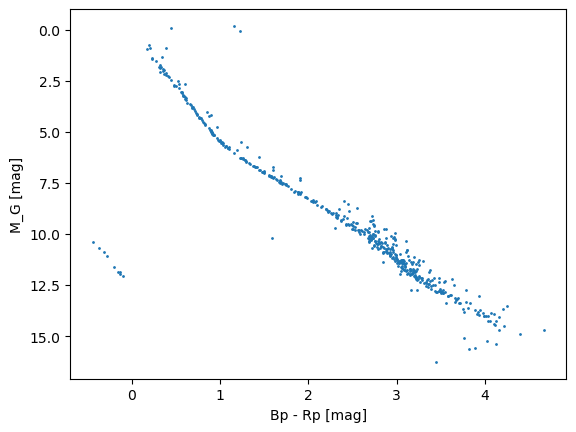

In [21]:
pl.figure()
pl.scatter(color, M_g, s= 1)
pl.gca().invert_yaxis()
pl.xlabel('Bp - Rp [mag]')
pl.ylabel('M_G [mag]')
pl.savefig('CMD_Mg.jpeg')
pl.show()

In [32]:
####### Graduate assignment #########
age400 = np.loadtxt('FEHp015/400z0208100y274P00O1D1E1.isc_gaia-dr3').T
age625 = np.loadtxt('FEHp015/625z0208100y274P00O1D1E1.isc_gaia-dr3').T
age800 = np.loadtxt('FEHp015/800z0208100y274P00O1D1E1.isc_gaia-dr3').T

In [33]:
print(age400)

[[ 0.1         0.10954279  0.11908557 ...  3.20700612  3.20712113
   3.20723615]
 [ 0.1         0.10954279  0.11908557 ...  3.18451674  3.18388553
   3.18308356]
 [-3.05987    -2.94795    -2.83619    ...  3.47044     3.51435
   3.56925   ]
 ...
 [16.692      15.9689     15.2402     ... -2.2342     -2.2825
  -2.3401    ]
 [12.8062     12.3969     11.9835     ... -4.1752     -4.2631
  -4.3723    ]
 [12.35       11.8842     11.4297     ... -4.6097     -4.7074
  -4.8295    ]]


In [41]:
for i in [400,625,800]:
    globals()['G{}'.format(i)] = globals()['age{}'.format(i)][4]
    globals()['Bp{}'.format(i)] = globals()['age{}'.format(i)][5]
    globals()['Rp{}'.format(i)] = globals()['age{}'.format(i)][6]
    globals()['Bp_Rp{}'.format(i)] = globals()['Bp{}'.format(i)]-globals()['Rp{}'.format(i)]

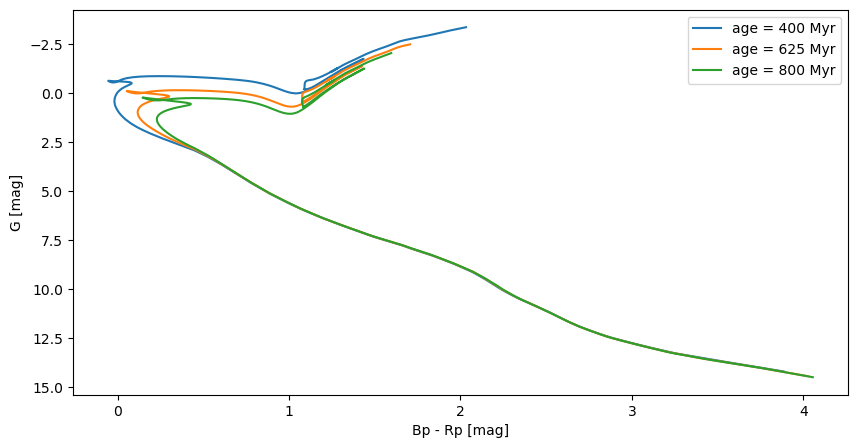

In [42]:
fig3 = pl.figure()
fig3.set_figheight(5)
fig3.set_figwidth(10)
for i in [400,625,800]:
    age= i
    pl.plot(globals()['Bp_Rp{}'.format(i)], globals()['G{}'.format(i)], label = 'age = '+str(age)+' Myr')
pl.ylabel('G [mag]')
pl.xlabel('Bp - Rp [mag]')
pl.gca().invert_yaxis()
pl.legend()
pl.show()

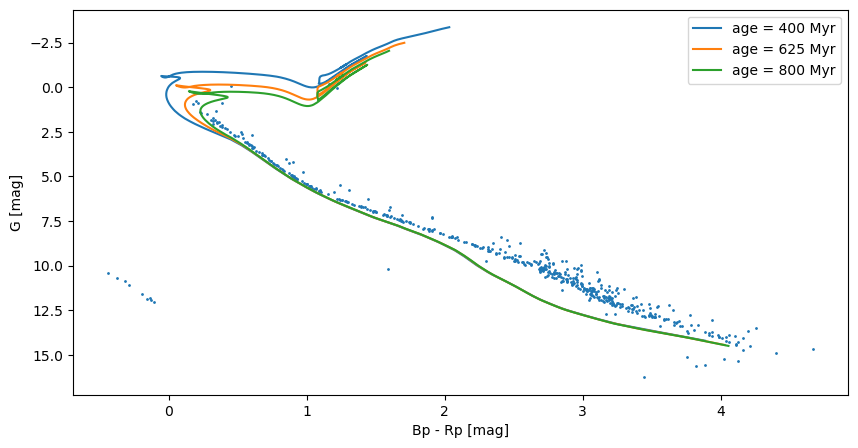

In [43]:
fig3 = pl.figure()
fig3.set_figheight(5)
fig3.set_figwidth(10)
for i in [400,625,800]:
    age= i
    pl.plot(globals()['Bp_Rp{}'.format(i)], globals()['G{}'.format(i)], label = 'age = '+str(age)+' Myr')
pl.scatter(color, M_g, s= 1)
pl.ylabel('G [mag]')
pl.xlabel('Bp - Rp [mag]')
pl.gca().invert_yaxis()
pl.legend()
pl.show()

In [45]:
###The age for the best fit is 625 Myr! They show the same turnoff point. 
